# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:

%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [ ]:

y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Dimensiones: (10495, 10)

Valores nulos por columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64


Numero de filas y columnas: 10495 filas y 10 columnas


,Price,Year,Mileage
count,10495.000000,10495.000000,10495.000000
mean,14538.403716,2013.553883,52509.430395
std,3922.420961,3.116585,36791.736601
min,5002.000000,1998.000000,5.000000
25%,11999.000000,2012.000000,26461.000000
50%,15000.000000,2014.000000,41680.000000
75%,16999.000000,2016.000000,71355.500000
max,32444.000000,2018.000000,232658.000000


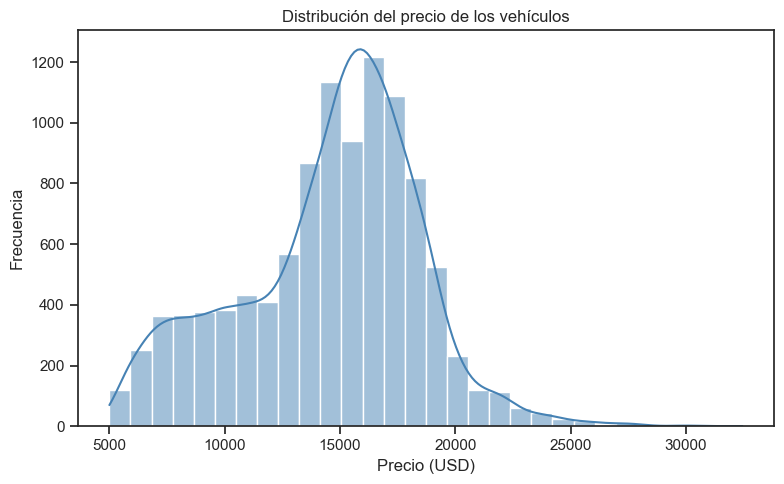

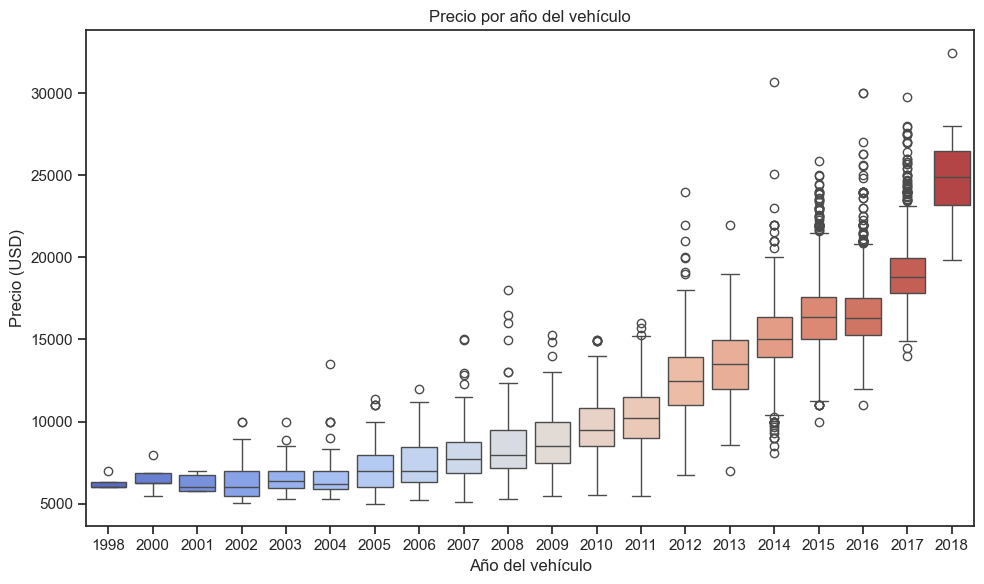

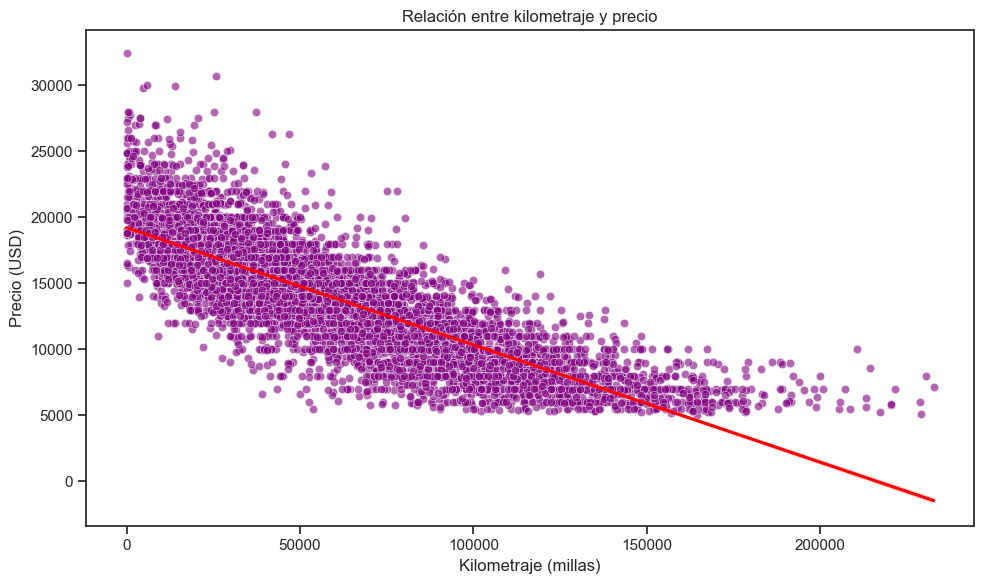

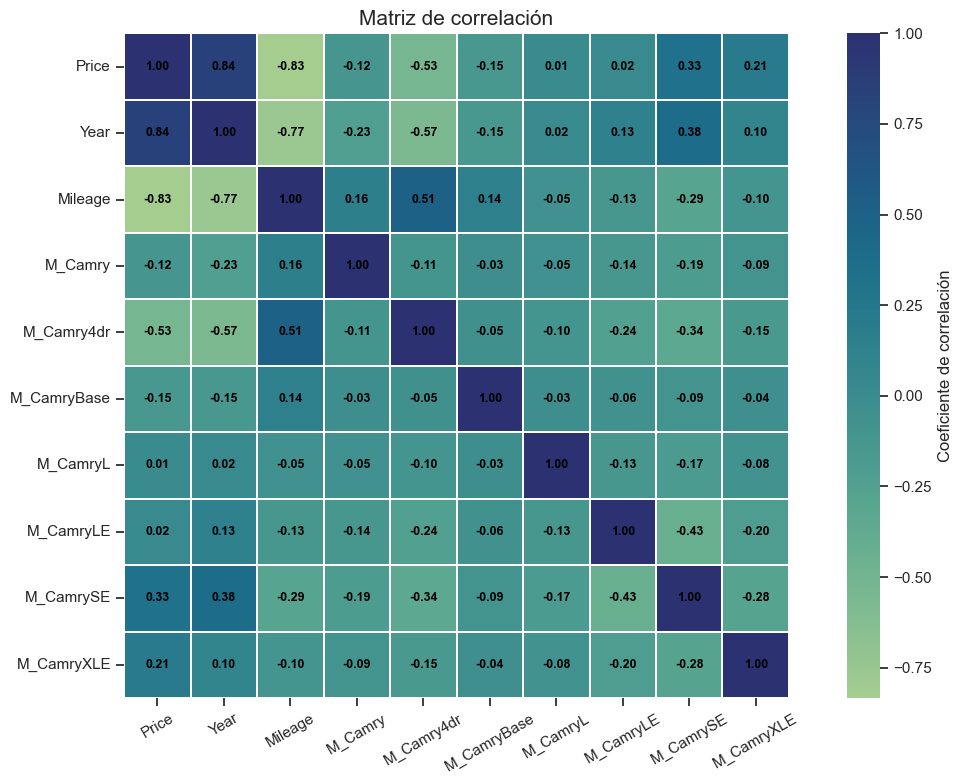

In [19]:
print("Dimensiones:", data.shape)
print("\nValores nulos por columna:")
print(data.isnull().sum())

print("\n")

print(f'Numero de filas y columnas: {data.shape[0]} filas y {data.shape[1]} columnas')


data = data.fillna(data.median(numeric_only=True))
display(data.describe())

plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True, color='steelblue', bins=30)
plt.title("Distribución del precio de los vehículos")
plt.xlabel("Precio (USD)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Price', data=data, palette='coolwarm')
plt.title("Precio por año del vehículo")
plt.xlabel("Año del vehículo")
plt.ylabel("Precio (USD)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=data, alpha=0.6, color='purple')
sns.regplot(x='Mileage', y='Price', data=data, scatter=False, color='red')
plt.title("Relación entre kilometraje y precio")
plt.xlabel("Kilometraje (millas)")
plt.ylabel("Precio (USD)")
plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 8))
sns.set_theme(style="ticks")

sns.heatmap(data.corr(),cmap='crest',annot=True,fmt=".2f",linewidths=0.3,square=True,annot_kws={"size": 9, "weight": "bold", "color": "black"},cbar_kws={'label': 'Coeficiente de correlación'})
plt.title('Matriz de correlación', fontsize=15)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Desempeño del modelo Random:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"MAPE: {mape:.2f} %")

Desempeño del modelo Random:
R² Score: 0.790
Mean Absolute Error (MAE): 1,334.21
(MAPE: 9.65 %


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [63]:

param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
}


rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,              
    cv=5,                   
    verbose=2,
    random_state=42,
    n_jobs=-1
)


rf_random.fit(X_train, y_train)


print("Mejores hiperparámetros encontrados:")
print(rf_random.best_params_)

best_rf = rf_random.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

print("\nDesempeño del modelo:")
print(f"Mean Squared Error: {mse_best:,.2f}")
print(f"R² Score: {r2_best:.3f}")
print(f"MAE: {mae_best:,.2f}")
print(f"MAPE: {mape_best:.2f} %")





Fitting 5 folds for each of 40 candidates, totalling 200 fits
Mejores hiperparámetros encontrados:
{'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10}

Desempeño del modelo:
Mean Squared Error: 2,534,598.28
R² Score: 0.834
MAE: 1,164.32
MAPE: 8.44 %


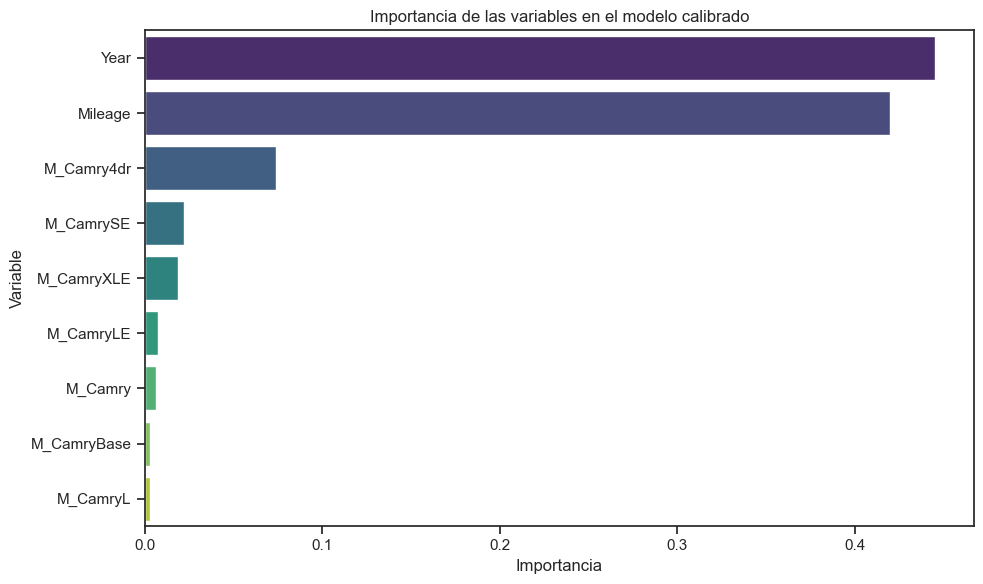


Ranking de importancia de variables:


,Feature,Importance
0,Year,0.444877
1,Mileage,0.419949
3,M_Camry4dr,0.073947
7,M_CamrySE,0.022385
8,M_CamryXLE,0.018730
6,M_CamryLE,0.007486
2,M_Camry,0.006357
4,M_CamryBase,0.003227
5,M_CamryL,0.003043


In [ ]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Importancia de las variables en el modelo calibrado')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

display(importances)



### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

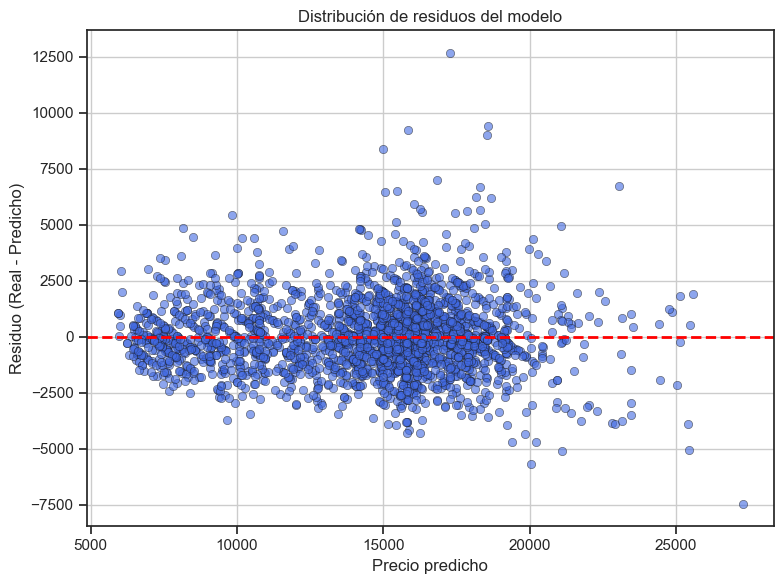

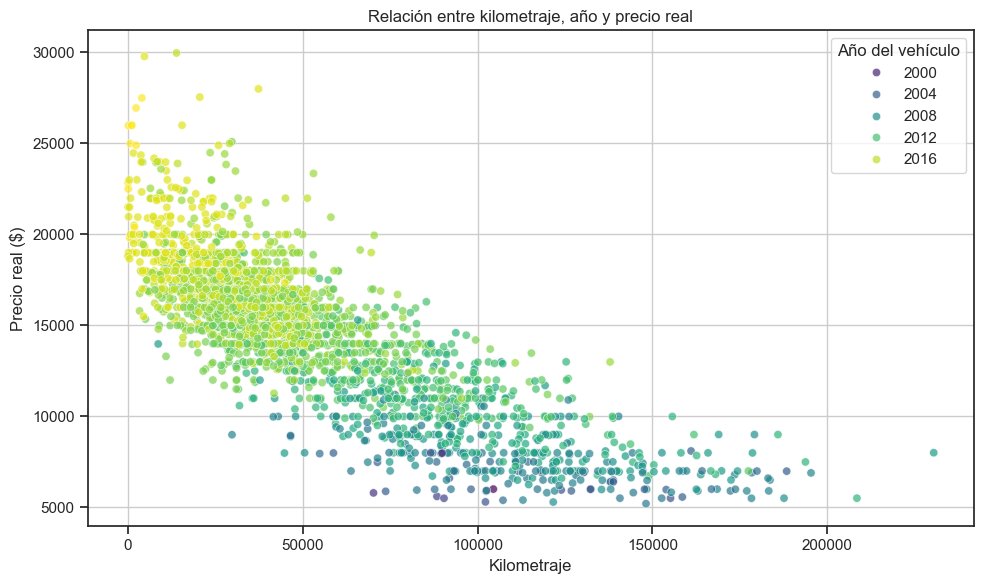

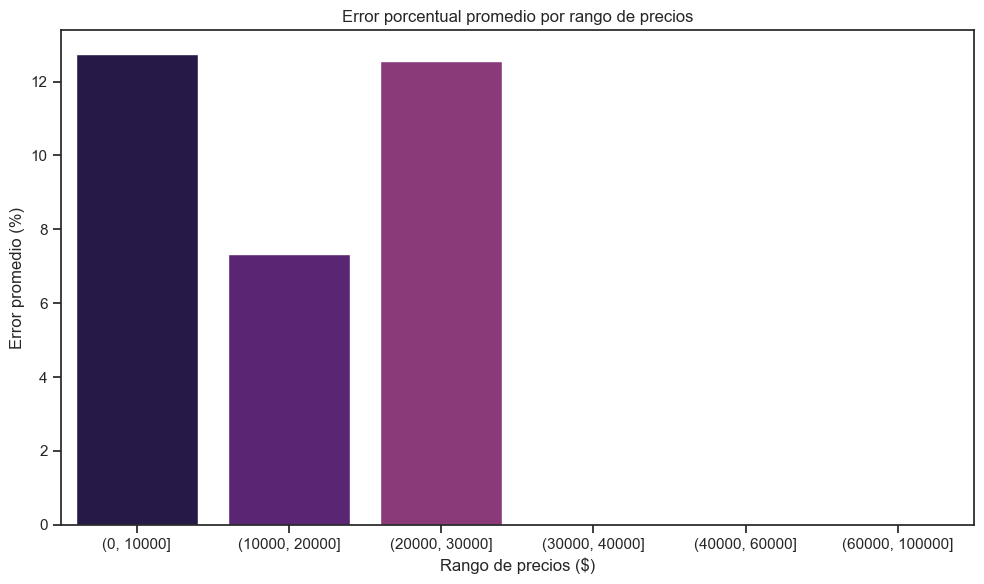

📊 Desempeño del modelo ajustado:
R² Score: 0.834
MAE: 1,164.32
MSE: 2,534,598.28
MAPE: 8.44 %

🧠 CONCLUSIONES:
- El modelo mantiene un R² de 0.84, con errores bajos y distribuidos de forma aleatoria (sin sesgos evidentes).
- Los gráficos de residuos muestran un comportamiento equilibrado, sin tendencia a sobre o subestimar precios.
- El análisis por rango de precios indica que el modelo tiene mayor precisión en autos de gama media.
- En vehículos muy antiguos o muy nuevos los errores son más variables, lo cual es esperable por diferencias de mercado.
- En general, el modelo demuestra robustez y estabilidad para predecir precios de autos en distintos contextos.


In [ ]:
residuos = y_test - y_pred_best
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_best, y=residuos, alpha=0.6, color='royalblue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Distribución de residuos del modelo')
plt.xlabel('Precio predicho')
plt.ylabel('Residuo (Real - Predicho)')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(
    x=X_test['Mileage'], 
    y=y_test, 
    hue=X_test['Year'], 
    palette='viridis', 
    alpha=0.7
)
plt.title('Relación entre kilometraje, año y precio real')
plt.xlabel('Kilometraje')
plt.ylabel('Precio real ($)')
plt.legend(title='Año del vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

bins = pd.cut(y_test, bins=[0,10000,20000,30000,40000,60000,100000])
error_rel = pd.DataFrame({
    'Rango_Precio': bins,
    'Error_%': np.abs((y_test - y_pred_best) / y_test) * 100
}).groupby('Rango_Precio').mean()

plt.figure(figsize=(10,6))
sns.barplot(x=error_rel.index.astype(str), y='Error_%', data=error_rel, palette='magma')
plt.title('Error porcentual promedio por rango de precios')
plt.xlabel('Rango de precios ($)')
plt.ylabel('Error promedio (%)')
plt.tight_layout()
plt.show()


print("Desempeño del modelo ajustado:")
print(f"R² Score: {r2_best:.3f}")
print(f"MAE: {mae_best:,.2f}")
print(f"MSE: {mse_best:,.2f}")
print(f"MAPE: {mape_best:.2f} %")

print("\nCONCLUSIONES:")
print("- El modelo mantiene un R² de 0.834, con errores bajos y distribuidos de forma aleatoria .")
print("- Los gráficos de residuos muestran un comportamiento equilibrado, sin tendencia a sobre o subestimar precios.")
print("- El análisis por rango de precios indica que el modelo tiene mayor precisión en autos de gama media.")
print("- En vehículos muy antiguos o muy nuevos los errores son más variables, lo cual es esperable por diferencias de mercado.")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.